In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, plot_roc_curve
import warnings
import datetime
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn import metrics

In [2]:
df = pd.read_csv("covid_data.csv")
corr = df.corr()
print(corr.abs().unstack().sort_values(kind="quicksort").drop_duplicates()[-5:])

people_vaccinated      total_vaccinations         0.993701
aged_70_older          aged_65_older              0.994141
total_vaccinations     people_fully_vaccinated    0.995965
total_cases            total_cases                1.000000
weekly_icu_admissions  handwashing_facilities          NaN
dtype: float64


In [3]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df = df.sort_values(by='date')
df = df.reset_index()
df = df.rename(columns={"index": "old_index"})

In [4]:


#too add to new table
df_fully_vaxed = pd.DataFrame({'location':[], 'percent_fully_vaccinated':[]})

visited_country = []
for i in range(len(df['location'])):
    if df['location'][i] in visited_country:
        continue
    selected_rows = df.loc[df['location'] == df['location'][i]]
    selected_rows.sort_values(by='date', ascending=False, inplace=True)
    selected_rows = selected_rows.dropna(subset=['people_fully_vaccinated'])
    population = selected_rows.loc[:, ['population']]
    people_fully_vaccinated = selected_rows.loc[:, ['people_fully_vaccinated']]
    max_pop =  population.max()
    max_fully_vax = people_fully_vaccinated.max()
    percent_fully_vaxed = max_fully_vax[0]/max_pop[0] *100
    visited_country.append(df['location'][i])
    df_fully_vaxed.loc[i] = {'location': df['location'][i], 'percent_fully_vaccinated': percent_fully_vaxed}
    #print(df['location'][i], ": ", percent_fully_vaxed)
    
#df_fully_vaxed = pd.DataFrame(data, index = data.keys())

In [5]:
df_fully_vaxed = df_fully_vaxed.dropna()
df_fully_vaxed

,location,percent_fully_vaccinated
0,Argentina,83.216580
1,Mexico,64.193974
7,Thailand,74.600148
12,Latvia,70.568350
13,Estonia,63.922782
...,...,...
101964,Kiribati,56.301196
102744,Cook Islands,86.355096
108912,Pitcairn,100.000000
110285,Niue,62.858607


In [6]:
cont_data = []
for i in range(len(df['date'])):
    continuous_date_without_year = df['date'][i].timetuple().tm_yday
    if df['year'][i]-2020 > 0:
        continuous_date_without_year += 365*(df['year'][i]-2020)
    cont_data.append(continuous_date_without_year)

In [7]:
df['cont_date'] = cont_data

In [8]:
df.fillna(0, inplace=True)

In [9]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
corr_matrix = df.corr().abs()
#plot the heatmap
#sns.heatmap(corr_matrix, annot=True, linewidths=.5)
corr_matrix

corr_matrix = corr_matrix[corr_matrix > 0.5]
corr_matrix = corr_matrix[corr_matrix.index.to_list()]
corr_matrix

,old_index,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year,month,day,cont_date
old_index,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_cases,NaN,1.000000,0.671675,0.694857,0.936711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.832231,0.831945,0.834292,0.842511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.615507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases,NaN,0.671675,1.000000,0.972753,0.706417,0.646532,0.633490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.558169,0.575254,0.563799,NaN,0.505043,0.506626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.543944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases_smoothed,NaN,0.694857,0.972753,1.000000,0.726616,0.640903,0.653186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.574808,0.591601,0.580264,NaN,0.502908,0.515329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.557168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_deaths,NaN,0.936711,0.706417,0.726616,1.000000,0.607181,0.626021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.833605,0.853855,0.836693,0.754619,0.623179,0.635393,NaN,NaN,NaN,NaN,NaN,0.536540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.713426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_deaths,NaN,NaN,0.646532,0.640903,0.607181,1.000000,0.976750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.594146,0.585540,NaN,NaN,NaN,NaN,NaN,0.571219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.686620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_deaths_smoothed,NaN,NaN,0.633490,0.653186,0.626021,0.976750,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.599691,0.604042,NaN,NaN,NaN,NaN,NaN,0.588348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.702108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_cases_per_million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.612696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.502548
new_c

In [10]:
#what columns using
df1_selected_columns = df[["cont_date","location", "gdp_per_capita", "extreme_poverty", "handwashing_facilities", "new_cases_smoothed_per_million","human_development_index"]]
df2_selected_columns = df_fully_vaxed[["location", "percent_fully_vaccinated"]]
df_merged = pd.merge(df1_selected_columns, df2_selected_columns, on="location", how="inner")
df_merged.fillna(0, inplace=True)


In [ ]:
df_merged

In [11]:
#X = df[["cont_date","new_people_vaccinated_smoothed", "icu_patients", "weekly_icu_admissions","total_vaccinations","new_cases_smoothed"]]
#Single_place = df[df['location'] == 'United States']

 
#Single_place = df[df["location"].isin(["India", "United States"])]
#X = Single_place[["cont_date", "total_deaths","total_boosters","human_development_index"]]
#Y = Single_place[["new_cases"]]


# X = df[["gdp_per_capita", "extreme_poverty","handwashing_facilities","new_cases_smoothed_per_million" ]]
X = df_merged[["gdp_per_capita", "extreme_poverty","handwashing_facilities","percent_fully_vaccinated","cont_date" ]]
Y = df_merged[["human_development_index"]]


Text(0, 0.5, 'human_development_index')

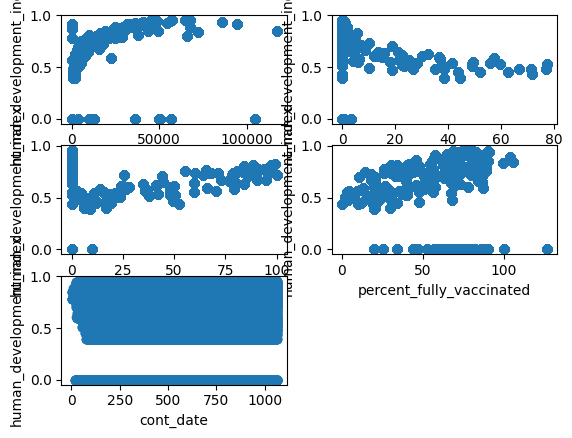

In [70]:

# plt.scatter(X,Y)
# plt.xlabel("percent_fully_vaccinated")
# plt.ylabel("human_development_index")





# Create two subplots
plt.subplot(3,2, 1)
plt.scatter(X["gdp_per_capita"],Y)
plt.xlabel("gdp_per_capita")
plt.ylabel("human_development_index")


plt.subplot(3, 2, 2)
plt.scatter(X["extreme_poverty"],Y)
plt.xlabel("extreme_poverty")
plt.ylabel("human_development_index")

plt.subplot(3, 2, 3)
plt.scatter(X["handwashing_facilities"],Y)
plt.xlabel("handwashing_facilities")
plt.ylabel("human_development_index")

plt.subplot(3, 2, 4)
plt.scatter(X["percent_fully_vaccinated"],Y)
plt.xlabel("percent_fully_vaccinated")
plt.ylabel("human_development_index")

plt.subplot(3, 2, 5)
plt.scatter(X["cont_date"],Y)
plt.xlabel("cont_date")
plt.ylabel("human_development_index")




Text(0, 0.5, 'human_development_index')

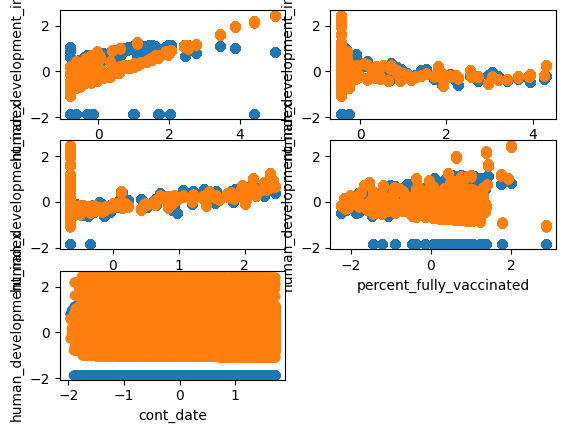

In [12]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
len(X_train)

from sklearn import preprocessing
x_scaler = preprocessing.StandardScaler().fit(X_train)
X_train = x_scaler.transform(X_train)

y_scaler = preprocessing.StandardScaler().fit(y_train)
y_train = y_scaler.transform(y_train)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train , y_train)

y_pred = model.predict(X_train)

plt.subplot(3, 2, 1)
plt.scatter(X_train[:, 0], y_train)
plt.scatter(X_train[:, 0],y_pred)
#plt.plot([min(X_train[:, 0]), max(X_train[:, 0])], [min(y_pred), max(y_pred)], color="orange")
plt.xlabel("gdp_per_capita")
plt.ylabel("human_development_index")


plt.subplot(3, 2, 2)
plt.scatter(X_train[:, 1], y_train)
plt.scatter(X_train[:, 1],y_pred)
plt.xlabel("extreme_poverty")
plt.ylabel("human_development_index")

plt.subplot(3, 2, 3)
plt.scatter(X_train[:, 2], y_train)
plt.scatter(X_train[:, 2],y_pred)
plt.xlabel("extreme_poverty")
plt.ylabel("human_development_index")


plt.subplot(3, 2, 4)
plt.scatter(X_train[:, 3], y_train)
plt.scatter(X_train[:, 3],y_pred)
plt.xlabel("percent_fully_vaccinated")
plt.ylabel("human_development_index")

plt.subplot(3, 2, 5)
plt.scatter(X_train[:, 4], y_train)
plt.scatter(X_train[:, 4],y_pred)
plt.xlabel("cont_date")
plt.ylabel("human_development_index")



In [13]:
print (f"Model coeficients for features {X.columns} are {model.coef_}")

Model coeficients for features Index(['gdp_per_capita', 'extreme_poverty', 'handwashing_facilities',
       'percent_fully_vaccinated', 'cont_date'],
      dtype='object') are [[ 0.5803518   0.03343636  0.28941558 -0.13146296 -0.01968924]]


In [14]:
MSE = metrics.mean_squared_error(y_train, y_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([MSE, RMSE], index=['MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MSE,0.688993
RMSE,0.830056


In [15]:
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)
y_pred= model.predict(X_test)

In [16]:
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([MSE, RMSE], index=['MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MSE,0.678258
RMSE,0.823564


In [17]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.3205671603991517

In [ ]:
y_pred

In [ ]:
y_pred = y_scaler.inverse_transform(y_pred)
y_pred